# Project 2 - Popping Popcorn


By Aditya Sudhakar and Colin Takeda

## Question
-----

When is the optimal time to stop cooking popcorn given a specific surface area to volume ratio to maximize edible yield. 

## Methodology
-----

First, we related the specific heat equation and the thermal conducitivity equation to find the change in temperature at each layer of the popcorn kernels. We know the ideal popping temperature of popcorn kernels to be 180 degrees Celcius. We approximated a popping rate for each kernel as there are expected to be duds. 

Next, we will create a model that has a surface area of 0.314 m<sup>2</sup> and we will change the volume of the popcorn kernels with additional layers. Each layer will have exactly 50 kernels. We will apply our derived change in temperature equation for each individual layer in conjunction with our pop rate to find the total number of unpopped, popped, and burnt kernels over time.

Assumptions: 
- Conduction only for the first layer
- Convection was approximated to 0.3 to account for humidity inside the pan
- Pan starts at 232.2 degrees Celcius
- The outside rim of the constraining cylinder does not affect cross sectional area
- Ignore oil temperature's effect on the system
- The thermal conducivity of rice (.031 w/mk) is similar to that of a popcorn kernel as they are both hard starches
- Kernels are not changing layers at any time. 
- Layers pop discretely

These assumptions for the most part are used to simplify the model and the different factors that affect the system. While these assumptions take away from the model's accuracy, we were able to focus more on the sources of heat that most directly affected the kernel's temperature. 

In [1]:
#figures appear in notebook
%matplotlib inline 

%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

#import modsim functions
from modsim import *  
from pandas import read_html 

In [2]:
system = System(t_0 = 0,
                t_final = 1000,  #Number of time steps
                
                pop_c = 1.510,   #Specific heat of popcorn kernel (J/K)
                al_c = 0.900,    #Specific heat of aluminum pan   (J/K)
                
                pop_rate = 0.95, #Rate from experimental testing
                
                pop_sa = 0.0314, #Surface area of kernels touching pan (m^2)
                pop_vol = 10,    #Volume of the all kernels (cm^3)
                pop_m = 10*1.05, #Mass of kernels in one layer (g)
                
                deltat = 209.2,  #Change in temperature of popcorn kernels (C)
                
                al_k = 2.05,     #Conductivity of aluminum pan (w/mk)
                pop_k = .031,    #Conductivity of rice (w/mk)
                
                al_d = .75,      #Thickness of pan (cm)
               
                layers = 8,
                kernelsperlayer = 10)  
                

state = State(kernels = system.kernelsperlayer * system.layers, #Starting number of kernels
              popped = 0,
              unpopped = 0,
              burnt = 0,
              #number of kernels in each layer
              layer1_pop = 10,
              layer2_pop = 10,
              layer3_pop = 10,
              layer4_pop = 10,
              layer5_pop = 10,
              layer6_pop = 10,
              layer7_pop = 10,
              layer8_pop = 10,
              
              #keeps track of temperature of individual layers
              al_temp = 23.,
              layer2_temp = 23.,
              layer3_temp = 23.,
              layer4_temp = 23.,
              layer5_temp = 23.,
              layer6_temp = 23.,
              layer7_temp = 23.,
              layer8_temp = 23.,
              
              #counters for keeping track of when a layer burns
              counter1 = 0,
              counter2 = 0,
              counter3 = 0,
              counter4 = 0,
              counter5 = 0,
              counter6 = 0,
              counter7 = 0,
              counter8 = 0,
              
             )
t=0

0

In [3]:
def temp_change(state, t, system):
    
    dp = 0
    
    unpack(system)
    
    #layer 1
    
    #teat transfer equation - this is the only layer which uses only conduction
    dtemp = ((al_k*(pop_sa*deltat)) / (al_d*pop_m*pop_c))
    state.al_temp += dtemp
    if state.al_temp >= 232.2:
        state.al_temp = 232.2
     
    #keeps track of when the popcorn is popping - counter value is updated to know when a layer burns
    if state.al_temp >= 180:
        state.counter1 += 1
        
        #slightly random chance of popcorn popping when a layer reaches optimal popping temperature
        if state.layer1_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped
                    
            #updating state variables        
            state.layer1_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
                    
    #burn function
    if state.counter1 == 120 and state.counter1 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 2
    
    #every other layer is the same as the first, except they also include convection as part of the temperature change over time
    dtemp2 = ((pop_k*(pop_sa*(state.al_temp-state.layer2_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.al_temp-state.layer2_temp))
    state.layer2_temp += dtemp2
    if state.layer2_temp >= 232.2:
        state.layer2_temp = 232.2

    if state.layer2_temp >= 180:
        state.counter2 += 1
        
        if state.layer2_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer2_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter2 == 120 and state.counter2 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 3    
    dtemp3 = ((pop_k*(pop_sa*(state.layer2_temp-state.layer3_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer2_temp-state.layer3_temp))
    state.layer3_temp += dtemp3
    if state.layer3_temp >= 232.2:
        state.layer3_temp = 232.2
        
    if state.layer3_temp >= 180:
        state.counter3 += 1
        
        if state.layer3_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer3_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
    
    if state.counter3 == 120 and state.counter3 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 4   
    dtemp4 = ((pop_k*(pop_sa*(state.layer3_temp-state.layer4_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer3_temp-state.layer4_temp))
    state.layer4_temp += dtemp4
    if state.layer4_temp >= 232.2:
        state.layer4_temp = 232.2
        
    if state.layer4_temp >= 180:
        state.counter4 += 1
        
        if state.layer4_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer4_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
    
    if state.counter4 == 120 and state.counter4 <121:
        change = 7
        state.popped -= change
        state.burnt += change   
        
        
 

    #layer 5 
    dtemp5 = ((pop_k*(pop_sa*(state.layer4_temp-state.layer5_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer4_temp-state.layer5_temp))
    state.layer5_temp += dtemp5
    if state.layer5_temp >= 232.2:
        state.layer5_temp = 232.2
        
    if state.layer5_temp >= 180:
        state.counter5 += 1
        
        if state.layer5_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer5_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
       
    if state.counter5 == 120 and state.counter5 <121:
        change = 7
        state.popped -= change
        state.burnt += change     
            
            
            
    #layer 6
    dtemp6 = ((pop_k*(pop_sa*(state.layer5_temp-state.layer6_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer5_temp-state.layer6_temp))
    state.layer6_temp += dtemp6
    if state.layer6_temp >= 232.2:
        state.layer6_temp = 232.2
        
    if state.layer6_temp >= 180:
        state.counter6 += 1
        
        if state.layer6_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer6_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter6 == 120 and state.counter6 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 7
    dtemp7 = ((pop_k*(pop_sa*(state.layer6_temp-state.layer7_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer6_temp-state.layer7_temp))
    state.layer7_temp += dtemp7
    if state.layer7_temp >= 232.2:
        state.layer7_temp = 232.2
        
    if state.layer7_temp >= 180:
        state.counter7 += 1
        
        if state.layer7_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer7_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))

    if state.counter7 == 120 and state.counter7 <121:
        change = 7
        state.popped -= change
        state.burnt += change
    
    
    
    #layer 8
    dtemp8 = ((pop_k*(pop_sa*(state.layer7_temp-state.layer8_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer7_temp-state.layer8_temp))
    state.layer8_temp += dtemp8
    if state.layer8_temp >= 232.2:
        state.layer8_temp = 232.2
        
    if state.layer8_temp >= 180:
        state.counter8 += 1
        
        if state.layer8_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer8_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter8 == 120 and state.counter8 <121:
        change = 7
        state.popped -= change
        state.burnt += change

    
    return state

In [4]:
def run_simulation(system, temp_change):
    
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = state
    
    for t in linrange(t_0, t_final):
        frame.row[t+1] = temp_change(frame.row[t], t, system)
        
    return frame

In [5]:
results = run_simulation(system, temp_change)
results

,kernels,popped,unpopped,burnt,layer1_pop,layer2_pop,layer3_pop,layer4_pop,layer5_pop,layer6_pop,...,layer7_temp,layer8_temp,counter1,counter2,counter3,counter4,counter5,counter6,counter7,counter8
0.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def plot_results(a, b, c, d, e, f, g, h):

    plot(h, '#FF0000',label='Layer 1',)
    plot(a, '#FF7F00',label='Layer 2')
    plot(b, 'y',label='Layer 3')
    plot(c, '#00FF00',label='Layer 4')
    plot(d, '#0000FF',label='Layer 5')
    plot(e, '#4B0082',label='Layer 6')
    plot(f, '#9400D3',label='Layer 7')
    plot(g, 'k',label='Layer 8')
 
    
    decorate(title='Change in Layer Temperature Over Time',
             xlabel='Time (seconds)',
             ylabel='Temperature (C)',
            loc=4)

In [7]:
def plot_results2(a, b, c, d):

    plot(a, 'r', label='Kernels')
    plot(b, 'y', label='Popped')
    plot(c, 'g', label='Unpopped')
    plot(d, 'k', label='Burnt')

    decorate(title = 'Change in Popcorn Types Over Time',
             xlabel='Time (seconds)',
             ylabel='Number of Popcorn')

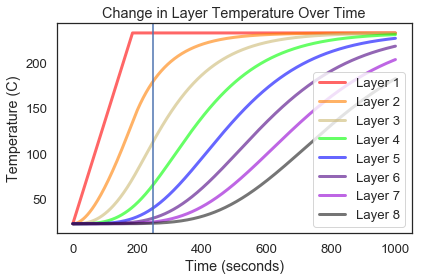

In [8]:
plot_results(results.layer2_temp,
             results.layer3_temp,
             results.layer4_temp,
             results.layer5_temp,
             results.layer6_temp,
             results.layer7_temp,
             results.layer8_temp,
             results.al_temp
            )
plt.axvline(x=250)

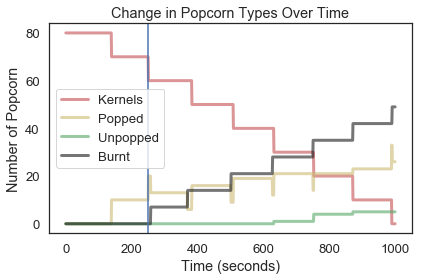

In [12]:
plot_results2(results.kernels, results.popped, results.unpopped, results.burnt)
plt.axvline(x=250)

## Results
-----

The final graphs from our test show each layer's change in temperature over time graph and the change in the in the number of each popcorn type over time. As expected the first layer has the steepest change in temperature over time as it is the only layer heated through conduction from the aluminum pan. The other layers are heated through conduction from other kernels and air convection. 

**Answer** -  The optimal time to maximize edible yield is 250 seconds. At this time one would have the largest yield of popped popcorn with no burnt kernels.

## Interpretation
-----

The final results for our data enables the user to choose a specific time allotment and then find the expected number of resulting kernels for this specific simulation. This information is beneficial to both the mundane popcorn user and industry experts (i.e. movie theaters). While constrained by the current surface area to volume ratio, the code for this model could be adapted to sweep multiple combinations to find different resulting yields. 

We made several changes during the iteration of our model. Originally, our final model provided only bar graphs of the final popcorn types' values. This graph proved to have little insight as it lacked a specific time at which one could maximize edible yield. Also, this model only really applied a pop rate probability to the inital kernel stock and then updated the other kernel types.

The final values for the code does not directly match reality. The biggest flaw of our model is that each layer is treated as one discrete unit. The only time other layers affect an individual layer is when accounting for temperature change. One major limitation is that everything is hardcoded, therefore it would be difficult to test for other conditions. At this moment, only a set surface area to volume is used versus our initial idea to test multiple different ratios. 


## Validation

During our testing we found that there are considerablely less burnt popcorn than the model would suggest. Also, the individual layers heat faster than expected and there are more unpopped kernels under the similar conditions.

## Abstract
-----

**Question** - When is the optimal time to stop cooking popcorn given a specific surface area to volume ratio to maximize edible yield. 

**Answer** - The optimal time to maximize edible yield is 250 seconds. At this time one would have the largest yield of popped popcorn with no burnt kernels.

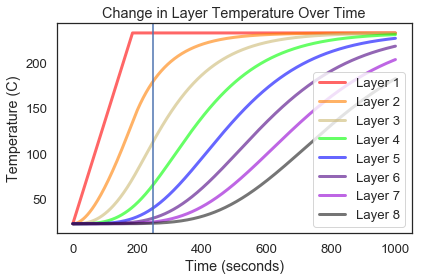

In [10]:
plot_results(results.layer2_temp,
             results.layer3_temp,
             results.layer4_temp,
             results.layer5_temp,
             results.layer6_temp,
             results.layer7_temp,
             results.layer8_temp,
             results.al_temp
            )
plt.axvline(x=250)

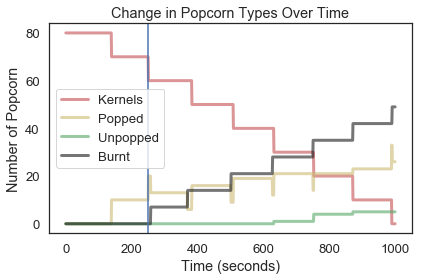

In [13]:
plot_results2(results.kernels, results.popped, results.unpopped, results.burnt)
plt.axvline(x=250)

It is only worthwhile to keep popcorn in the pot for a short time as this will minimize the amount of kernels that are burnt. Also, having multiple layers doesn't add value as it allows the bottom layers to burn. 